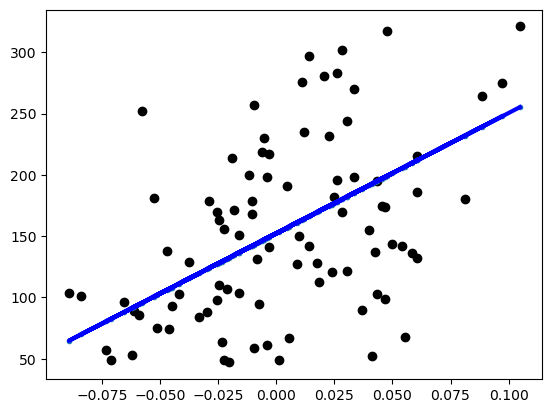

In [129]:
import matplotlib.pylab as plt
import numpy as np
from sklearn import linear_model
from sklearn import datasets

#load dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

#choose only BMI index
diabetes_X_new = diabetes_X[:, np.newaxis, 2]

from sklearn.model_selection import train_test_split

#split the dataset as train, test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.2, random_state=0)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

plt.plot(X_test, y_pred, '.')
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [132]:
import numpy as np
print(np.mean((regr.predict(X_test)-y_test)**2))

print(regr.score(X_test, y_test))

4150.680189329985
0.19057346847560108


# problem 1
As you can see the regression score, it is too low.
How can you get the higher regression score?
Make an higher regression score code referring to the given code.
And Explain more than one line why you choose the method and
Explain the results by comparing original code and your own.

ANS : LinearRegression also allows Multilinear Regression. Multi-linear regression is the method that is used to fit a multidimensional surface to the multidimensional data. Instead of using $$y = ax$$ we use $$y = a_1 x_1 + a_2 x_2 + ... + a_n x_n$$ for n variables. Then the multi-linear regression will minimize the total square residuals. \\
I used this method since the diabetes could be dependent on a more various factors than just the single variable, which was BMI for the original code. This model improved the score up to 0.2 points

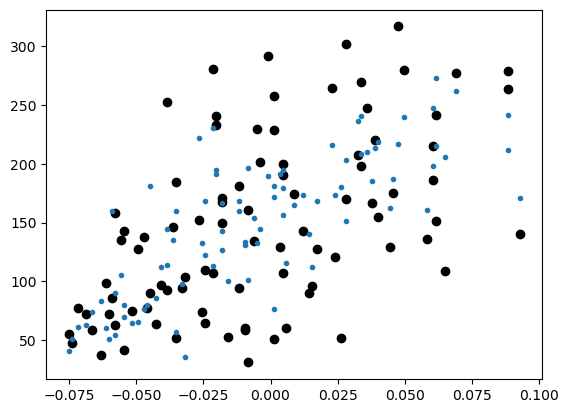

In [127]:
# adding two columns to fit better 
diabetes_X_fixed = diabetes_X

from sklearn.model_selection import train_test_split

#split the dataset as train, test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_fixed, diabetes_y, test_size=0.2)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

plt.plot(X_test[:,2], y_pred, '.')
plt.scatter(X_test[:,2], y_test, color='black')
#plt.plot(X_test[:], y_pred, color='blue', linewidth=3)
plt.show()

In [131]:
print(np.mean((regr.predict(X_test)-y_test)**2))

regr.score(X_test, y_test)

4150.680189329985


0.19057346847560108

# Problem 2
As you can see Accuracy for the test dataset is not high such as 68%.
Make a new method to upgrade the accuracy by using Naïve Bayes
method.

ANS : I adjusted test_size from 0.3 to 0.2 to improve my accuracy of the model. using training data 70% of the original data would lead to underfitting the data. To remedy this, I increased my training data set from 70% to 80% by reducing the test_size.

In [164]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
import os


df = pd.read_csv('./2025/Data_Science/Week5 code and data/data/meeting_data_200.csv')
print('=== Loaded CSV Data (head) ===')
print(df.head())

# 2. 범주형 변수(Label Encoding) -> 숫자로 변환
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# 3. 특성(x)과 타겟(y) 분리
X = df.drop('attend', axis=1)
y = df['attend']

# 4. 데이터 분할 (70% 학습, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 5. 모델 학습
model = CategoricalNB()
model.fit(X_train, y_train)


# 6. 예측
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('\n=== Test Dataset Performance ===')
print(f'Accuracy: {accuracy:.2f}')
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
# 7. 새로운 상황 예측 (예시)
new_data = pd.DataFrame({
    'nearCampus': [label_encoders['nearCampus'].transform(['far'])[0]],
    'cost': [label_encoders['cost'].transform(['cheap'])[0]],
    'timeOfDay': [label_encoders['timeOfDay'].transform(['day'])[0]],
    'friend': [label_encoders['friend'].transform(['withFriend'])[0]],
})
new_pred = model.predict(new_data)
new_pred_label = label_encoders['attend'].inverse_transform(new_pred)
print('\n=== New Situation Prediction ===')
print(f'Predicted Attendance: {new_pred_label[0]}')

=== Loaded CSV Data (head) ===
  nearCampus       cost timeOfDay      friend attend
0       near     normal       day  withFriend    Yes
1        far      cheap     night  withFriend    Yes
2        far      cheap     night  withFriend    Yes
3       near  expensive     night  withFriend     No
4       near     normal       day  withFriend    Yes

=== Test Dataset Performance ===
Accuracy: 0.75

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.93      0.76      0.84        17

    accuracy                           0.75        20
   macro avg       0.63      0.72      0.64        20
weighted avg       0.84      0.75      0.78        20


=== New Situation Prediction ===
Predicted Attendance: Yes


# Problem 3
[Decision Tree with petrol Consumption Dataset]
(slide p.61~p.64) 

As you can see the metrics Mean Absolute Error/Mean Squared Error/
Root Mean Squared Error, it is too high.

How can you get the lower error rate?

Make an lower error rate referring to the given code.

And Explain more than one line why you choose the method and
Explain the results by comparing original code and your own.

Hint: refer to slide 50.

You can tune the hyper-parameter of the model such as max_depth, max_features etc.
Reference : sklearn.tree.DecisionTreeRegressor — scikit-learn 1.3.2 documentation

ANS : I hypertuned my max_depth to 3. Since there are four criteria that influences the Petrol_Consumption, I limited the maximum depth of tree to 3 and set minimum number of data points in one leaf to 5. I did this because there appeared some bins in the histogram that have only one data point. I thought setting the minimum value of leaf would reduce the probability of decision value becoming biased to some extreme values, which will result in skewed data classification.

In [171]:
dataset = pd.read_csv('./2025/Data_Science/Week5 code and data/data/petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [172]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [235]:
# dataset.drop() ~ remove by the parameter axis =1 means column, axis = 0 means row
# remove column 'Petrol_Consumption' 
X = dataset.drop('Petrol_Consumption', axis=1) 
y = dataset['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=6, max_depth=3)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 55.6
Mean Squared Error: 4461.921088435374
Root Mean Squared Error: 66.79761289473879


In [179]:
df

,Actual,Predicted
29,534,541.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,574.0
37,704,554.0
34,487,648.0
40,587,525.0
7,467,414.0
10,580,464.0
